<center>
<img src="logo.png" height="900"> 
</center>


#  Проклятье размерности

Генерация ни в коем случае не заменяет аналитической работы. С ней возникает ряд неочевидных проблем. 

---------------

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# 1. Проклятье размерности 

> Объём данных, необходимый для надёжного результата растёт с увеличением размерности экспоненциально.

Предположим, что у нас есть $50$ точек с отрезка от $0$ до $100$. Посмотрим сколько точек для расчётов будет приходиться на каждую из ячеек длины $20$. 

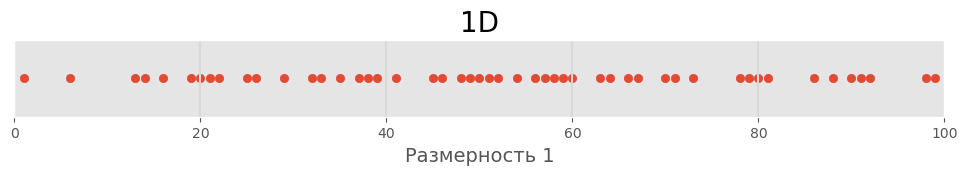

In [3]:
x = np.random.choice(range(0,100), size=50, replace=False)
y = np.zeros_like(x)

plt.figure(figsize=(12, 1))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color= '#D8D8D8')
    
plt.xlim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("")
plt.yticks([], [])
plt.title("1D", fontsize=20);

Если нам нужно анализировать попадание случайной величины в каждый из пяти интервалов, у нас в среднем есть $\frac{50}{5} = 10$ наблюдений на одну ячейку. __Посмотрим на двумерный случай.__

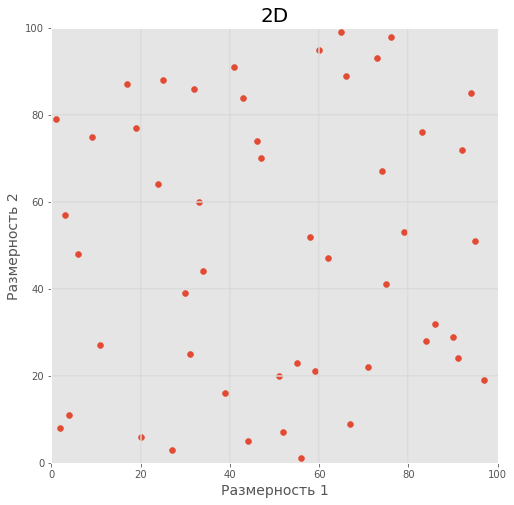

In [3]:
x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)

plt.figure(figsize = (8, 8))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')
    
plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("Размерность 2", fontsize=14)
plt.title("2D", fontsize=20);

У нас есть по $5$ интервалов в каждом измерении. Теперь на каждую ячейку приходится в среднем $\frac{50}{5 \cdot 5} = 2$ точки. Начинают возникать ячейки, в которых нам не хватает данных для работы. __Посмотрим на трёхмерный случай.__

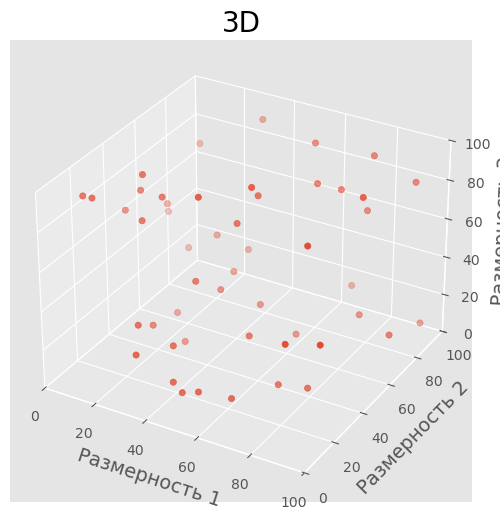

In [5]:
from mpl_toolkits import mplot3d

x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)
z = np.random.choice(range(0,100), size=50, replace=False)

fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(x, y, z)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')
    
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ax.set_xlabel("Размерность 1", fontsize=14)
ax.set_ylabel("Размерность 2", fontsize=14)
ax.set_zlabel("Размерность 3", fontsize=14)
plt.title("3D", fontsize=20);

Появляется ещё $5$ интервалов на третьем измерении. В среднем на каждую ячейку мы получаем $\frac{50}{5 \cdot 5 \cdot 5} = 0.4$ наблюдения. 

__C каждой новой размерностью появляется новое пространство.__ Нам нужно заполнять его $\Rightarrow$ число симуляций, необходимых для устойчивых выводов экспоненциально увеличивается. 

- Для размерности $1$ нам надо покрыть точками $5$ ячеек
- Для размерности $2$ нам надо покрыть точками уже $5^2$ ячеек 
- Для размерности $3$ нам надо покрыть точками уже $5^3$ ячеек

Если мы сгенерируем для размерности $1$ $50$ точек, в среднем в каждой ячейке окажется по $10$. Для размерности $2$ для такого же результата нам уже понадобится $250$ точек. Для размерности $10$ нужно будет $97656250$ точек.

In [ ]:
10*5**10

97656250

: 

# 2. Вычисление числа $\pi$  

Попробуем с помощью генераций вычислить число $\pi$. Для начала найдём площадь окружности с радиусом $1$:

$$
x^2 + y^2 = 1.
$$

Можно поступить так: впишем окружность в квадрат $(0,0):(1,1)$, сгенерируем несколько точек в этом квадрате.

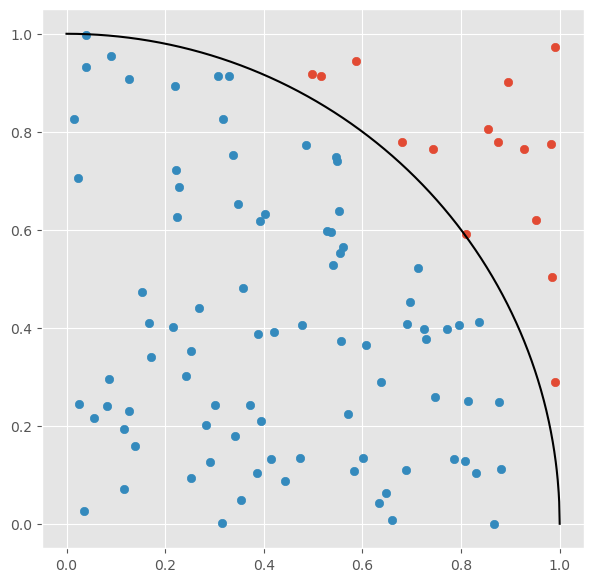

In [6]:
n_obs = 100

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)

plt.figure(figsize=(7,7))

p = np.linspace(0, 1, 1000)
plt.plot(p, np.sqrt(1 - p**2), color='black')

usl = x**2 + y**2 > 1
plt.scatter(x[usl], y[usl])
plt.scatter(x[~usl], y[~usl]);

Заметим, что только часть точек попала в окружность. Доля точек, лежащих внутри равна площади окружности. Чтобы точнее найти площадь, увеличим число генераций.

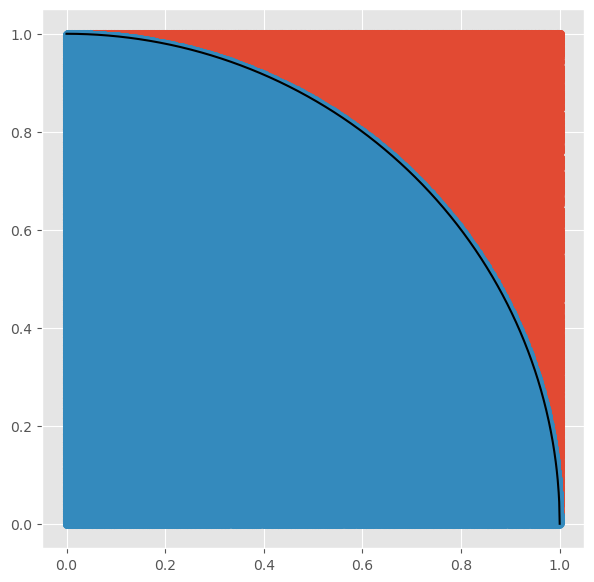

In [7]:
n_obs = 10**6

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)

plt.figure(figsize=(7,7))

p = np.linspace(0, 1, 1000)
plt.plot(p, np.sqrt(1 - p**2), color='black')

usl = x**2 + y**2 > 1
plt.scatter(x[usl], y[usl])
plt.scatter(x[~usl], y[~usl]);

In [8]:
np.mean(x**2 + y**2 <= 1) # вероятность попасть в четверть окружности (её площадь)

np.float64(0.785477)

$$S = \frac{1}{4} \cdot \pi R^2 \Rightarrow \pi = 4 \cdot S $$

In [8]:
4*np.mean(x**2 + y**2 <= 1)

3.141668

Получили число $\pi$. Чем больше симуляций мы сделаем, тем точнее оно будет. 

Теперь попробуем получить его же, используя вместо окружности шар. Объём восьмой части шара можно посчитать по формуле: 

$$ V = \frac{1}{8} \cdot \frac{4}{3} \cdot \pi \cdot R^3 \Rightarrow \pi = 8 \cdot \frac{3}{4} \cdot V $$

In [9]:
n_obs = 10**6

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)
z = np.random.uniform(0, 1, size=n_obs)

8 * 3/4 * np.sum(x**2 + y**2 + z**2 <= 1)/n_obs

np.float64(3.13944)

Точность при том же числе генераций оказалась ниже. Теперь попробуем сделать то же самое, используя шар в $d$-мерном пространстве. Для его объёма можно получить формулу

$$
V = \frac{\pi^{\tfrac{d}{2}}}{\Gamma \left( \frac{d}{2}  + 1\right)} \cdot R^d,
$$

где $\Gamma(t)$ - гамма-функция. Она обобщает понятие факториала для непрерывного случая. Выразим число $\pi$

$$
\pi = \left(V \cdot \Gamma \left( \frac{d}{2} + 1 \right) \right)^\frac{2}{d}.
$$

In [10]:
from scipy.special import gamma

def find_pi(ndim, n_obs = 10**6):
    
    # сгенерировали точки
    x = [np.random.uniform(0, 1, size=n_obs) for _ in range(ndim)]

    dist = np.zeros(n_obs) # считаем расстояние от начала координат до точки
    for item in x:
         dist += item**2 
         
    V = np.sum(dist <= 1)/n_obs  # объём фигуры
    
    # 2**ndim из-за того, что мы всегда смотрим на кусочек фигуры (1/4 окружности, 1/8 шара и тд)
    pi = (2**ndim * V * gamma((ndim/2)+1))**(2/ndim) 
    return pi

In [11]:
find_pi(ndim=2)

np.float64(3.141664)

In [12]:
find_pi(ndim=3)

np.float64(3.1418735449180337)

In [13]:
find_pi(ndim=5)

np.float64(3.1469913083709993)

Попробуем посмотреть как мы будем приближаться к числу $\pi$ в зависимости от размерности пространства, в котором происходят симуляции. 

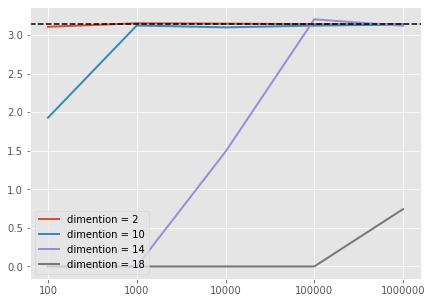

In [14]:
plt.figure(figsize=(7,5))

n_sim = [10**i for i in range(2, 7)]
dim = [2, 10, 14, 18]

for d in dim:        # размерность 
    cur_res = [ ]
    
    for n in n_sim:  # число симуляций
        pi = [ ]
        
        for _ in range(20):            # каждый эксперимент проводим 20 раз 
            pi.append(find_pi(d, n))   # и усредняем результат
            
        cur_res.append(np.mean(pi))

    plt.plot(range(2, 7), cur_res, label=f'dimention = {d}', lw=2)

plt.axhline(y=np.pi, color='black', linestyle='--')
plt.xticks(np.arange(2, len(n_sim)+2), n_sim)
plt.legend(loc='lower left');

По оси $x$ отложено число симуляций, по оси $y$ приближение числа $\pi$. Каждая траектория - приближение числа $\pi$ при разных размерностях пространства для симуляций. __Для более высоких размерностей требуетмя на порядок больше точек, чтобы получить число $\pi$ с высокой точностью.__

### Резюме: 

При работе с генерациями могут возникать проблемы: 

- Сложности при генерации многомерных случайных величин (проклятье размерности)
- Сложности связанные с генерацией независимых случайных величин
- Сложности связанные со сходимостями последовательностей случайных величин не к тому распределению
